In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, auc,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
# Load and preprocess the data
data = pd.read_csv('wine_dataset.csv')
if 'wine_type' in data.columns:
    data['wine_type'] = data['wine_type'].map({'red': 1, 'white': 0})
#if 'quality' in data.columns:
   #data['quality'] = data['quality'].map({'3': 0, '4': 1, '5': 2, '6': 3, '7': 4, '8': 5, '9': 6})
X = data.drop(['quality'], axis=1)  # Assuming 'quality' is the target and 'wine_type' should be excluded
y = data['quality']

In [3]:
map_dict = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
    9: 6  # You can adjust these mappings as needed
}

# Function to map using the dictionary
def map_value(value):
    return map_dict.get(value, "Value not in range")


y = y.apply(lambda x: map_value(x))

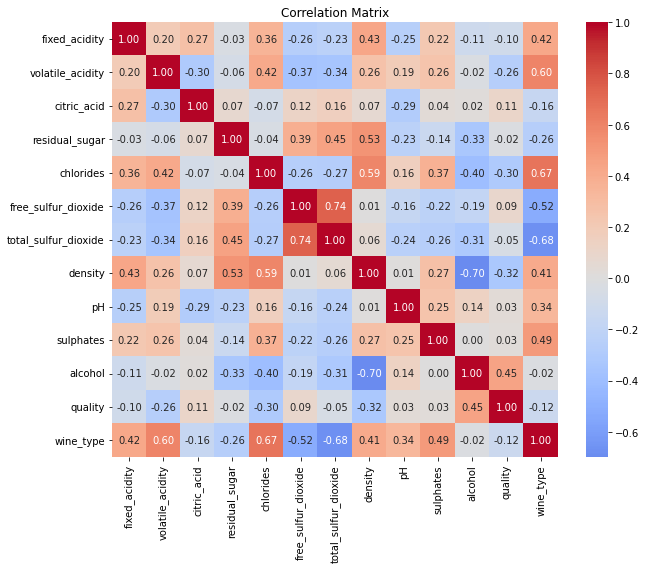

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
print(data['quality'].value_counts(normalize=True))

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64


In [19]:
print(data['quality'].nunique())

7


In [8]:
print(data['quality'].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Name: quality, Length: 6497, dtype: bool


In [9]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(random_state=42)
}

In [10]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [11]:
# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Random Forest Accuracy: 0.6731
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      0.14      0.23        43
           2       0.66      0.74      0.70       402
           3       0.67      0.75      0.71       597
           4       0.71      0.53      0.60       215
           5       0.92      0.33      0.49        36
           6       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.36      0.39      1300
weighted avg       0.68      0.67      0.66      1300

SVM Accuracy: 0.4508
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        43
           2       0.38      0.16      0.22       402
           3       0.46      0.88      0.60       597
           4       0.00      0.00      0.00       215
           5       0.00   

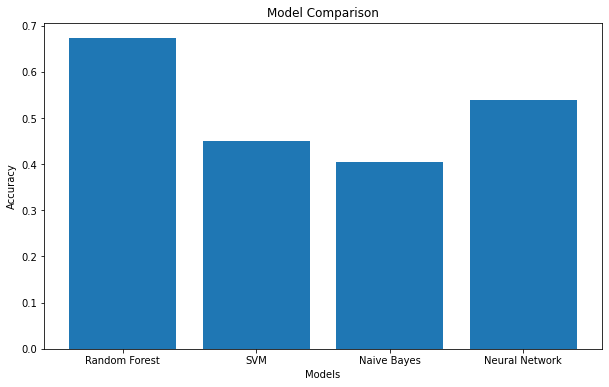

In [12]:
def create_pipeline(classifier):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Set zero_division to 0 to avoid the warning
    print(classification_report(y_test, y_pred, zero_division=0))

# Plot model comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

# Learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
     
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

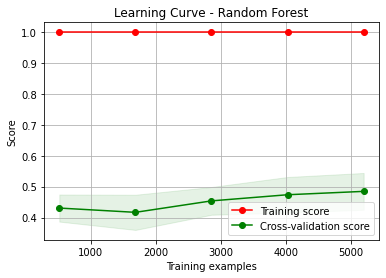

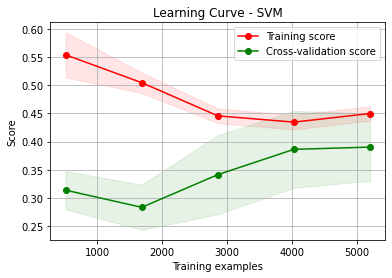

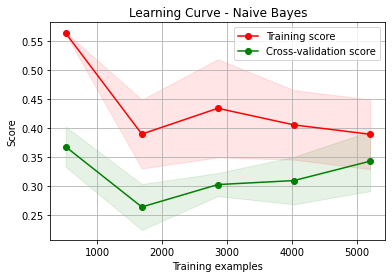

C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\harsh\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

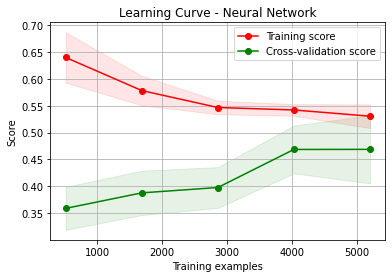

In [13]:
# Plot learning curves for each model
for name, model in models.items():
    plt = plot_learning_curve(model, f'Learning Curve - {name}', X, y, cv=5)
    plt.show()


Training Random Forest...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.6777
Precision: 0.6787
Recall: 0.6777
F1-score: 0.6659
ROC AUC Score: 0.8558


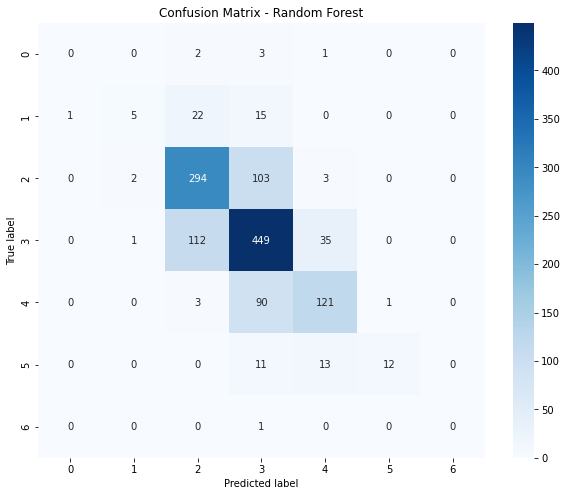

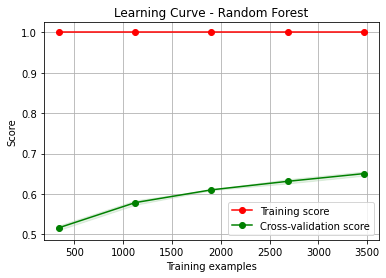

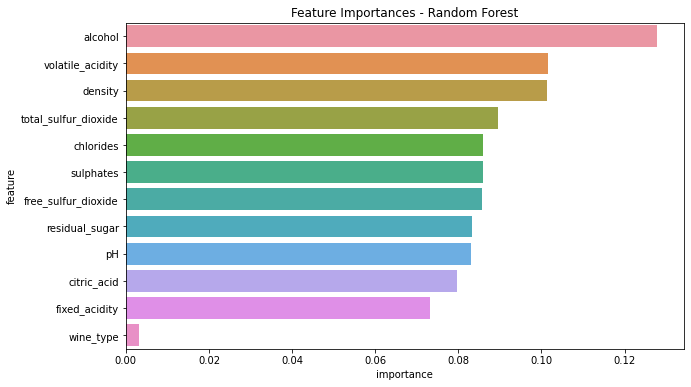


Training SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5838
Precision: 0.5750
Recall: 0.5838
F1-score: 0.5620
ROC AUC Score: 0.7649


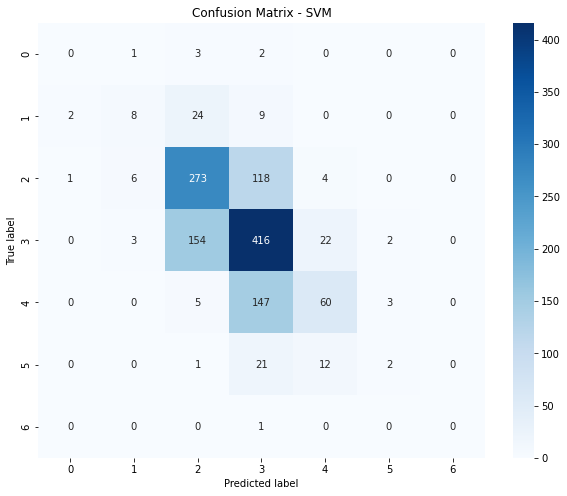

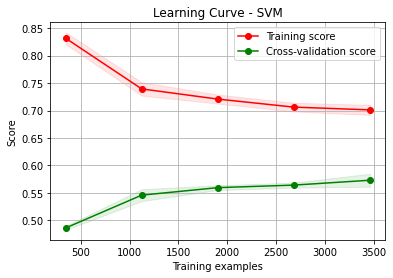


Training Neural Network...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 32, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000}
Accuracy: 0.6185
Precision: 0.6135
Recall: 0.6185
F1-score: 0.6158
ROC AUC Score: 0.7643


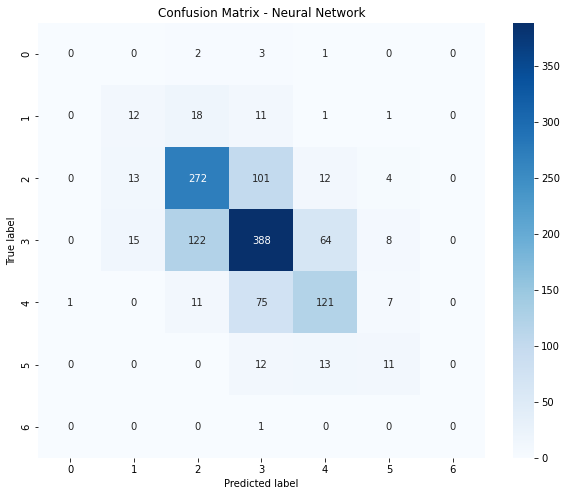

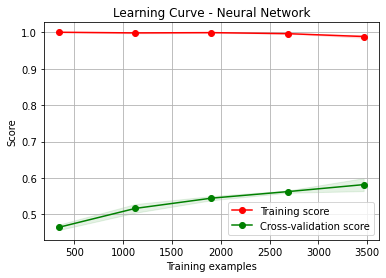


Training Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters: {'var_smoothing': 1e-07}
Accuracy: 0.3708
Precision: 0.4673
Recall: 0.3708
F1-score: 0.4013
ROC AUC Score: 0.6315


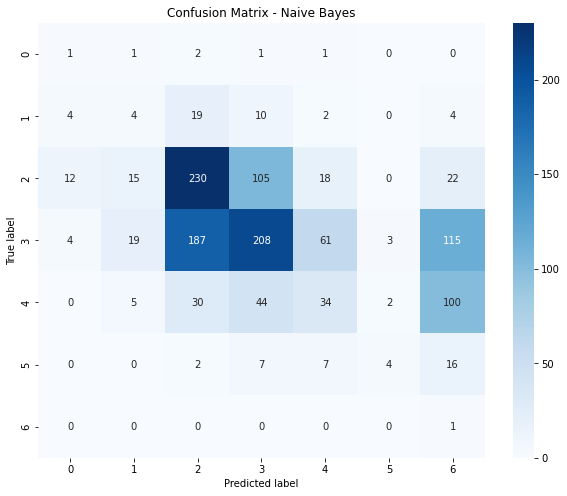

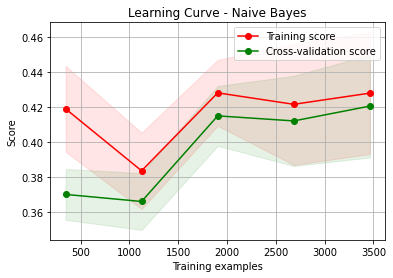

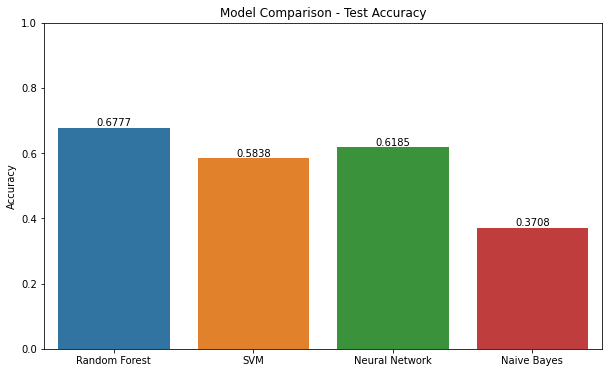


Training completed for all models.


In [14]:
# Define models and parameter grids
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Neural Network': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt'],
        'class_weight': ['balanced', None]
        
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale'],
        'class_weight': ['balanced', None]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'batch_size': [32, 64, 128],
        'max_iter' : [1000]
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]  # Added parameter grid for Naive Bayes
    }
}


# Training and evaluation
grid_searches = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=3, n_jobs=8, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    grid_searches.append(grid_search)
    
    # Best model and predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=0)
    y_pred_proba = best_model.predict_proba(X_test_scaled)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    
    # Print results and plot confusion matrix
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    plot_confusion_matrix(cm, f'Confusion Matrix - {name}')
    plot_learning_curve(best_model, f"Learning Curve - {name}", X_train_scaled, y_train, cv=3)
    plt.show()
    
    # Feature importances for applicable models
    if name == 'Random Forest':
        feature_importance = best_model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=importance_df)
        plt.title(f'Feature Importances - {name}')
        plt.show()
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test_scaled)) for model in [grid_search.best_estimator_ for grid_search in grid_searches]]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

print("\nTraining completed for all models.")


In [18]:
# Plot loss curve for Neural Network
if name == 'Neural Network':
    plt.figure(figsize=(10, 6))
    plt.plot(best_model.loss_curve_)
    plt.title('Neural Network Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.show()


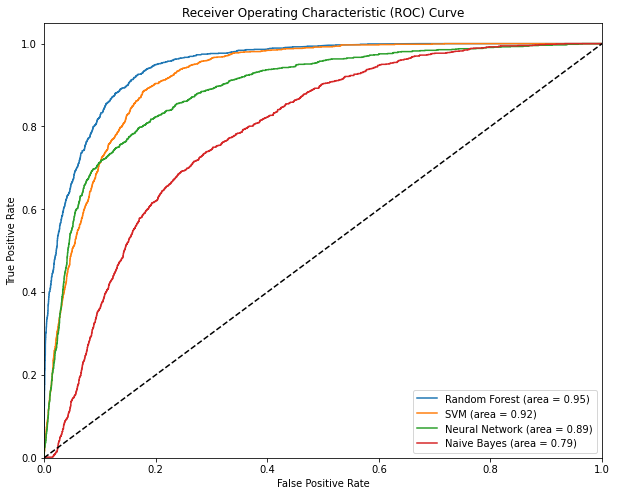


Training completed for all models.


In [16]:
# ROC Curve for all models
plt.figure(figsize=(10, 8))

for name, model in zip(model_names, [grid_search.best_estimator_ for grid_search in grid_searches]):
    y_pred_proba = model.predict_proba(X_test_scaled)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(y))):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"], label=f'{name} (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\nTraining completed for all models.")

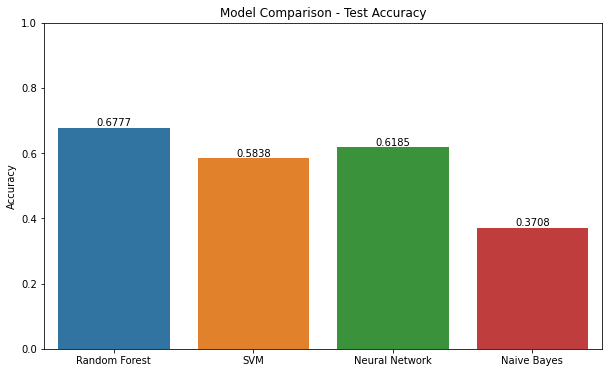

In [17]:

# Comparison of models
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, model.predict(X_test_scaled)) for model in [grid_search.best_estimator_ for grid_search in grid_searches]]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison - Test Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()
